<a href="https://colab.research.google.com/github/davidjonathan01/HolaMundoKotlin/blob/master/SistemaLogicaDifusa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importar librerías necesarias**


In [ ]:
pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

### **Definir las variables de entrada**

In [ ]:
# Definir las variables de entrada (valores del formulario para desarrollo, seguridad y análisis)
desarrollo_resolucion = ctrl.Antecedent(np.arange(0, 11, 1), 'desarrollo_resolucion')
seguridad_infraestructura = ctrl.Antecedent(np.arange(0, 11, 1), 'seguridad_infraestructura')
analisis_procesamiento = ctrl.Antecedent(np.arange(0, 11, 1), 'analisis_procesamiento')

In [ ]:
'''
desarrollo_resolucion.automf(3)
seguridad_infraestructura.automf(3)
analisis_procesamiento.automf(3)
'''

# Definir los conjuntos difusos manualmente con los intervalos deseados

# Desarrollo y Resolución
desarrollo_resolucion['poor'] = fuzz.trapmf(desarrollo_resolucion.universe,[0, 0, 2, 5])  # Ajuste manual
desarrollo_resolucion['average'] = fuzz.trimf(desarrollo_resolucion.universe, [2, 5, 8])  # Ajuste manual
desarrollo_resolucion['good'] = fuzz.trapmf(desarrollo_resolucion.universe, [5, 8, 10, 10])  # Ajuste manual

# Seguridad e Infraestructura
seguridad_infraestructura['poor'] = fuzz.trapmf(seguridad_infraestructura.universe,[0, 0, 2, 5])  # Ajuste manual
seguridad_infraestructura['average'] = fuzz.trimf(seguridad_infraestructura.universe,[2, 5, 8])  # Ajuste manual
seguridad_infraestructura['good'] = fuzz.trapmf(seguridad_infraestructura.universe, [5, 8, 10, 10])  # Ajuste manual

# Análisis y Procesamiento
analisis_procesamiento['poor'] = fuzz.trapmf(analisis_procesamiento.universe, [0, 0, 2, 5])  # Ajuste manual
analisis_procesamiento['average'] = fuzz.trimf(analisis_procesamiento.universe,  [2, 5, 8])  # Ajuste manual
analisis_procesamiento['good'] = fuzz.trapmf(analisis_procesamiento.universe,  [5, 8, 10, 10])  # Ajuste manual

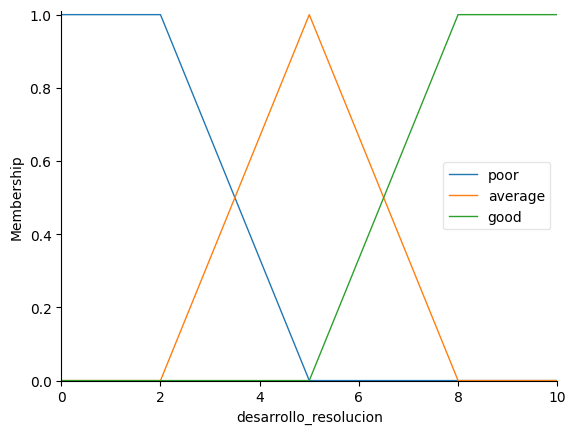

In [ ]:
desarrollo_resolucion.view()

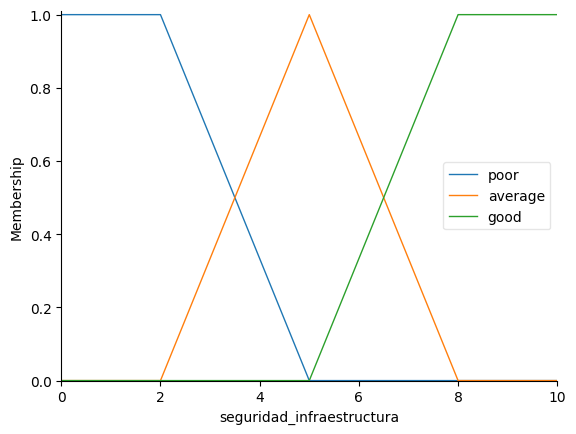

In [ ]:
seguridad_infraestructura.view()

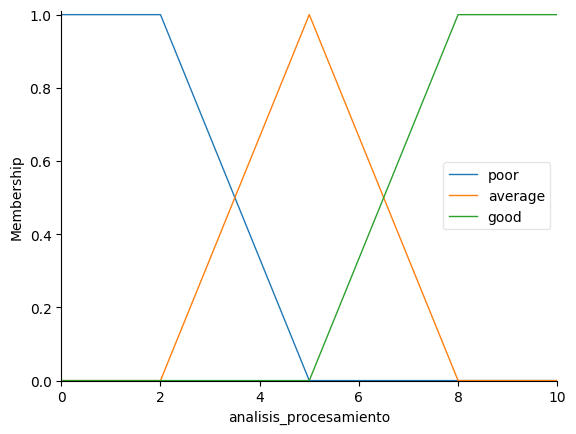

In [ ]:
analisis_procesamiento.view()

### **Definir las variables de salida (Especialidades)**

In [ ]:
# Definir la variable de salida como un rango numérico para cuantificar las especialidades
especialidad = ctrl.Consequent(np.arange(0, 101, 1), 'especialidad')

In [ ]:
# Definir los conjuntos difusos para las especialidades
especialidad['Desarrollo Web (Frontend)'] = fuzz.trimf(especialidad.universe, [0, 10, 20])
especialidad['Administracion de Sistemas'] = fuzz.trimf(especialidad.universe, [10, 20, 30])
especialidad['Analisis de Datos'] = fuzz.trimf(especialidad.universe, [20, 30, 40])
especialidad['Ciberseguridad'] = fuzz.trimf(especialidad.universe, [30, 40, 50])
especialidad['Ciencia de Datos'] = fuzz.trimf(especialidad.universe, [40, 50, 60])
especialidad['Ingenieria de Redes'] = fuzz.trimf(especialidad.universe, [50, 60, 70])
especialidad['Desarrollo Web (Backend)'] = fuzz.trimf(especialidad.universe, [60, 70, 80])
especialidad['Machine Learning'] = fuzz.trimf(especialidad.universe, [70, 80, 90])
especialidad['Arquitectura de Software'] = fuzz.trimf(especialidad.universe, [80, 90, 100])
especialidad['Internet de las Cosas (IoT)'] = fuzz.trimf(especialidad.universe, [90, 100, 100])

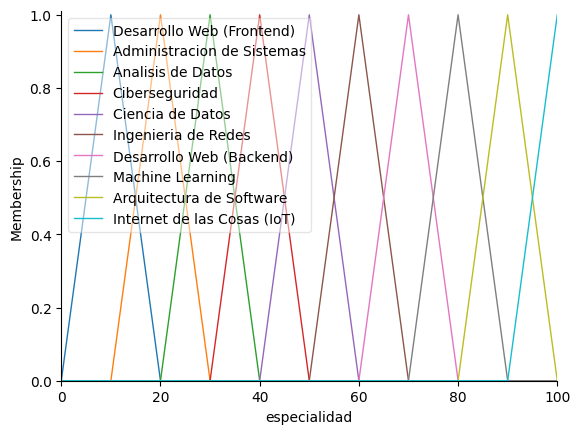

In [ ]:
especialidad.view()

### **Definir las reglas difusas**

In [ ]:
# Definir las reglas difusas
reglas = [
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['poor'] & analisis_procesamiento['poor'], especialidad['Analisis de Datos']),
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['poor'] & analisis_procesamiento['average'], especialidad['Ciencia de Datos']),
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['poor'] & analisis_procesamiento['good'], especialidad['Ciencia de Datos']),
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['average'] & analisis_procesamiento['poor'], especialidad['Ingenieria de Redes']),
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['average'] & analisis_procesamiento['average'], especialidad['Ciberseguridad']),
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['average'] & analisis_procesamiento['good'], especialidad['Ciberseguridad']),
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['good'] & analisis_procesamiento['poor'], especialidad['Ciberseguridad']),
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['good'] & analisis_procesamiento['average'], especialidad['Ingenieria de Redes']),
    ctrl.Rule(desarrollo_resolucion['poor'] & seguridad_infraestructura['good'] & analisis_procesamiento['good'], especialidad['Ciencia de Datos']),

    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['poor'] & analisis_procesamiento['poor'], especialidad['Desarrollo Web (Frontend)']),
    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['poor'] & analisis_procesamiento['average'], especialidad['Analisis de Datos']),
    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['poor'] & analisis_procesamiento['good'], especialidad['Ciencia de Datos']),
    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['average'] & analisis_procesamiento['poor'], especialidad['Desarrollo Web (Backend)']),
    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['average'] & analisis_procesamiento['average'], especialidad['Ciencia de Datos']),
    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['average'] & analisis_procesamiento['good'], especialidad['Machine Learning']),
    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['good'] & analisis_procesamiento['poor'], especialidad['Arquitectura de Software']),
    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['good'] & analisis_procesamiento['average'], especialidad['Machine Learning']),
    ctrl.Rule(desarrollo_resolucion['average'] & seguridad_infraestructura['good'] & analisis_procesamiento['good'], especialidad['Machine Learning']),

    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['poor'] & analisis_procesamiento['poor'], especialidad['Desarrollo Web (Backend)']),
    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['poor'] & analisis_procesamiento['average'], especialidad['Desarrollo Web (Backend)']),
    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['poor'] & analisis_procesamiento['good'], especialidad['Machine Learning']),
    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['average'] & analisis_procesamiento['poor'], especialidad['Arquitectura de Software']),
    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['average'] & analisis_procesamiento['average'], especialidad['Ciencia de Datos']),
    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['average'] & analisis_procesamiento['good'], especialidad['Ciencia de Datos']),
    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['good'] & analisis_procesamiento['poor'], especialidad['Arquitectura de Software']),
    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['good'] & analisis_procesamiento['average'], especialidad['Ciberseguridad']),
    ctrl.Rule(desarrollo_resolucion['good'] & seguridad_infraestructura['good'] & analisis_procesamiento['good'], especialidad['Machine Learning']),
]

### **Crear el sistema de control difuso**

In [ ]:
# Crear el sistema de control difuso
sistema_control = ctrl.ControlSystem(reglas)
simulador = ctrl.ControlSystemSimulation(sistema_control)

### **Asignar valores de entrada**

Pertenencia de programacion 4:
  poor: 0.3333333333333333
  average: 0.6666666666666666
  good: 0.0
Pertenencia de ciberseguridad 3:
  poor: 0.6666666666666666
  average: 0.3333333333333333
  good: 0.0
Pertenencia de analisis_datos 8:
  poor: 0.0
  average: 0.0
  good: 1.0


56.86661114581163

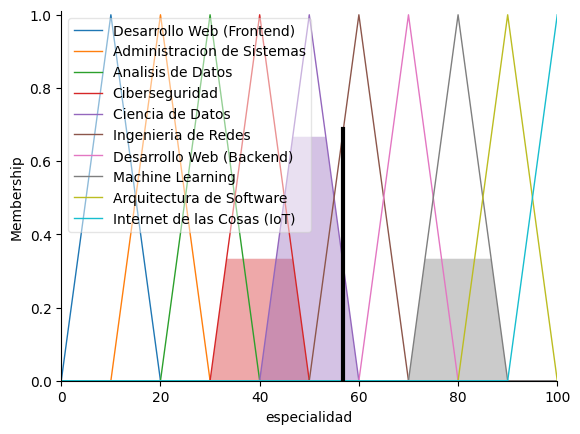

In [ ]:
# Asignar valores de entrada (respuestas del formulario)
desarrollo_resolucion_input = 4 # Ejemplo
seguridad_infraestructura_input = 3 # Ejemplo
analisis_procesamiento_input = 8  # Ejemplo
# Pasar los valores al simulador
simulador.input['desarrollo_resolucion'] = desarrollo_resolucion_input
simulador.input['seguridad_infraestructura'] = seguridad_infraestructura_input
simulador.input['analisis_procesamiento'] = analisis_procesamiento_input

# Mostrar valores de pertenencia de las entradas
print(f"Pertenencia de programacion {desarrollo_resolucion_input}:")
print(f"  poor: {desarrollo_resolucion['poor'].mf[desarrollo_resolucion_input]}")
print(f"  average: {desarrollo_resolucion['average'].mf[desarrollo_resolucion_input]}")
print(f"  good: {desarrollo_resolucion['good'].mf[desarrollo_resolucion_input]}")

print(f"Pertenencia de ciberseguridad {seguridad_infraestructura_input}:")
print(f"  poor: {seguridad_infraestructura['poor'].mf[seguridad_infraestructura_input]}")
print(f"  average: {seguridad_infraestructura['average'].mf[seguridad_infraestructura_input]}")
print(f"  good: {seguridad_infraestructura['good'].mf[seguridad_infraestructura_input]}")

print(f"Pertenencia de analisis_datos {analisis_procesamiento_input}:")
print(f"  poor: {analisis_procesamiento['poor'].mf[analisis_procesamiento_input]}")
print(f"  average: {analisis_procesamiento['average'].mf[analisis_procesamiento_input]}")
print(f"  good: {analisis_procesamiento['good'].mf[analisis_procesamiento_input]}")

simulador.compute()

especialidad.view(sim=simulador)
simulador.output['especialidad']

In [ ]:
# Función dinámica para calcular valores de pertenencia para un valor de entrada
def obtener_valores_pertenencia(variable, valor_entrada):
    return {
        'poor': fuzz.interp_membership(variable.universe, variable['poor'].mf, valor_entrada),
        'average': fuzz.interp_membership(variable.universe, variable['average'].mf, valor_entrada),
        'good': fuzz.interp_membership(variable.universe, variable['good'].mf, valor_entrada)
    }

# Función para generar combinaciones dinámicas de pertenencias
def generar_combinaciones(desarrollo_input, seguridad_input, analisis_input):
    # Obtener los valores de pertenencia para cada variable
    desarrollo_resolucion_input = obtener_valores_pertenencia(desarrollo_resolucion, desarrollo_input)
    seguridad_infraestructura_input = obtener_valores_pertenencia(seguridad_infraestructura, seguridad_input)
    analisis_procesamiento_input = obtener_valores_pertenencia(analisis_procesamiento, analisis_input)

    # Lista para guardar las combinaciones
    combinaciones = []

    # Generar combinaciones de valores de pertenencia
    for d_label, d_val in desarrollo_resolucion_input.items():
        for s_label, s_val in seguridad_infraestructura_input.items():
            for a_label, a_val in analisis_procesamiento_input.items():
                # Guardar la combinación
                combinacion = {
                    'desarrollo_resolucion': d_label,
                    'desarrollo_valor': d_val,
                    'seguridad_infraestructura': s_label,
                    'seguridad_valor': s_val,
                    'analisis_procesamiento': a_label,
                    'analisis_valor': a_val
                }
                combinaciones.append(combinacion)

    return combinaciones

# Ejemplo: asignar valores de entrada
desarrollo_input = desarrollo_resolucion_input
seguridad_input = seguridad_infraestructura_input
analisis_input = analisis_procesamiento_input

# Obtener todas las combinaciones
combinaciones = generar_combinaciones(desarrollo_input, seguridad_input, analisis_input)

# Imprimir todas las combinaciones
for combinacion in combinaciones:
    print(f"Desarrollo: {combinacion['desarrollo_resolucion']} (valor: {combinacion['desarrollo_valor']}), "
          f"Seguridad: {combinacion['seguridad_infraestructura']} (valor: {combinacion['seguridad_valor']}), "
          f"Análisis: {combinacion['analisis_procesamiento']} (valor: {combinacion['analisis_valor']})")

Desarrollo: poor (valor: 0.3333333333333333), Seguridad: poor (valor: 0.6666666666666666), Análisis: poor (valor: 0.0)
Desarrollo: poor (valor: 0.3333333333333333), Seguridad: poor (valor: 0.6666666666666666), Análisis: average (valor: 0.0)
Desarrollo: poor (valor: 0.3333333333333333), Seguridad: poor (valor: 0.6666666666666666), Análisis: good (valor: 1.0)
Desarrollo: poor (valor: 0.3333333333333333), Seguridad: average (valor: 0.3333333333333333), Análisis: poor (valor: 0.0)
Desarrollo: poor (valor: 0.3333333333333333), Seguridad: average (valor: 0.3333333333333333), Análisis: average (valor: 0.0)
Desarrollo: poor (valor: 0.3333333333333333), Seguridad: average (valor: 0.3333333333333333), Análisis: good (valor: 1.0)
Desarrollo: poor (valor: 0.3333333333333333), Seguridad: good (valor: 0.0), Análisis: poor (valor: 0.0)
Desarrollo: poor (valor: 0.3333333333333333), Seguridad: good (valor: 0.0), Análisis: average (valor: 0.0)
Desarrollo: poor (valor: 0.3333333333333333), Seguridad: goo

In [ ]:
import pandas as pd

# Función dinámica para calcular valores de pertenencia para un valor de entrada
def obtener_valores_pertenencia(variable, valor_entrada):
    return {
        'poor': fuzz.interp_membership(variable.universe, variable['poor'].mf, valor_entrada),
        'average': fuzz.interp_membership(variable.universe, variable['average'].mf, valor_entrada),
        'good': fuzz.interp_membership(variable.universe, variable['good'].mf, valor_entrada)
    }

# Función para generar combinaciones dinámicas de pertenencias y seleccionar la mejor
def generar_combinaciones(desarrollo_input, seguridad_input, analisis_input):
    # Obtener los valores de pertenencia para cada variable
    desarrollo_resolucion_input = obtener_valores_pertenencia(desarrollo_resolucion, desarrollo_input)
    seguridad_infraestructura_input = obtener_valores_pertenencia(seguridad_infraestructura, seguridad_input)
    analisis_procesamiento_input = obtener_valores_pertenencia(analisis_procesamiento, analisis_input)

    # Lista para guardar las combinaciones
    combinaciones = []

    # Generar combinaciones de valores de pertenencia
    for d_label, d_val in desarrollo_resolucion_input.items():
        for s_label, s_val in seguridad_infraestructura_input.items():
            for a_label, a_val in analisis_procesamiento_input.items():
                # Guardar la combinación y calcular el valor mínimo
                combinacion = {
                    'desarrollo_resolucion': d_label,
                    'desarrollo_valor': d_val,
                    'seguridad_infraestructura': s_label,
                    'seguridad_valor': s_val,
                    'analisis_procesamiento': a_label,
                    'analisis_valor': a_val,
                    'min_valor': min(d_val, s_val, a_val)  # Calcular el valor mínimo
                }
                combinaciones.append(combinacion)

    # Convertir a DataFrame para facilitar análisis
    df = pd.DataFrame(combinaciones)

    # Seleccionar la combinación con el máximo valor mínimo
    best_combination_idx = df['min_valor'].idxmax()

    # Guardar la mejor combinación y el índice
    mejor_combinacion = df.loc[best_combination_idx]
    mejor_combinacion['indice'] = best_combination_idx + 1  # Ajustar para 1-based index

    return mejor_combinacion

# Función para seleccionar la especialidad basada en el índice
def seleccionar_especialidad_por_indice(indice):
    # Extraer la regla correspondiente del arreglo reglas
    regla_seleccionada = reglas[indice - 1]  # Restar 1 para obtener el índice correcto (1-based index)

    # Extraer el nombre de la especialidad desde la regla
    especialidad_str = str(regla_seleccionada.consequent)  # Convertir a string

    # Parsear la cadena para extraer la carrera entre los corchetes
    especialidad_recomendada = especialidad_str.split('[')[-1].split(']')[0]

    return especialidad_recomendada

# Ejemplo: asignar valores de entrada
desarrollo_input = desarrollo_resolucion_input
seguridad_input = seguridad_infraestructura_input
analisis_input = analisis_procesamiento_input


# Obtener la mejor combinación
mejor_combinacion = generar_combinaciones(desarrollo_input, seguridad_input, analisis_input)

# Obtener la especialidad recomendada
especialidad_recomendada = seleccionar_especialidad_por_indice(mejor_combinacion['indice'])

# Imprimir la mejor combinación con el índice y la especialidad recomendada
print(f"La mejor combinación es:")
print(f"Desarrollo: {mejor_combinacion['desarrollo_resolucion']} (valor: {mejor_combinacion['desarrollo_valor']})")
print(f"Seguridad: {mejor_combinacion['seguridad_infraestructura']} (valor: {mejor_combinacion['seguridad_valor']})")
print(f"Análisis: {mejor_combinacion['analisis_procesamiento']} (valor: {mejor_combinacion['analisis_valor']})")
print(f"Mínimo valor: {mejor_combinacion['min_valor']}")
print(f"Índice de la iteración seleccionada: {mejor_combinacion['indice']}")
print(f"La carrera recomendada es: {especialidad_recomendada}")


La mejor combinación es:
Desarrollo: average (valor: 0.6666666666666666)
Seguridad: poor (valor: 0.6666666666666666)
Análisis: good (valor: 1.0)
Mínimo valor: 0.6666666666666666
Índice de la iteración seleccionada: 12
La carrera recomendada es: Ciencia de Datos


<ipython-input-15-18b2abe33439>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mejor_combinacion['indice'] = best_combination_idx + 1  # Ajustar para 1-based index
<ipython-input-15-18b2abe33439>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mejor_combinacion['indice'] = best_combination_idx + 1  # Ajustar para 1-based index
